# Гипотеза,влияет ли жанр на рейтинг фильмов

Датасет взял отсюда: https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset?select=IMDb+movies.csv


In [4]:
import pandas as pd
import numpy as np
import pylab
from scipy import stats
import random


In [5]:
ratings = pd.read_csv('IMDb ratings.csv')

In [6]:
movies = pd.read_csv('IMDb movies.csv', low_memory=False)

In [7]:
df=ratings.merge(movies, how = 'left', left_on='imdb_title_id', right_on='imdb_title_id')

In [8]:
df=df[['imdb_title_id', 'title', 'weighted_average_vote', 'genre', 'duration', 'production_company']]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85855 entries, 0 to 85854
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   weighted_average_vote  85855 non-null  float64
 3   genre                  85855 non-null  object 
 4   duration               85855 non-null  int64  
 5   production_company     81400 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.6+ MB


In [10]:
df.head()

,imdb_title_id,title,weighted_average_vote,genre,duration,production_company
0,tt0000009,Miss Jerry,5.9,Romance,45,Alexander Black Photoplays
1,tt0000574,The Story of the Kelly Gang,6.1,"Biography, Crime, Drama",70,J. and N. Tait
2,tt0001892,Den sorte drøm,5.8,Drama,53,Fotorama
3,tt0002101,Cleopatra,5.2,"Drama, History",100,Helen Gardner Picture Players
4,tt0002130,L'Inferno,7.0,"Adventure, Drama, Fantasy",68,Milano Film


Пример добычи списка рейтинга фильмов по жанру Crime:


In [11]:
df1 = df[df['genre'].str.contains("Crime")]
df1.head()

,imdb_title_id,title,weighted_average_vote,genre,duration,production_company
1,tt0000574,The Story of the Kelly Gang,6.1,"Biography, Crime, Drama",70,J. and N. Tait
11,tt0002844,Fantômas - À l'ombre de la guillotine,7.0,"Crime, Drama",54,Société des Etablissements L. Gaumont
13,tt0003037,Juve contre Fantômas,7.0,"Crime, Drama",61,Société des Etablissements L. Gaumont
16,tt0003165,Le mort qui tue,7.0,"Crime, Drama, Mystery",90,Société des Etablissements L. Gaumont
19,tt0003471,Traffic in Souls,6.0,"Crime, Drama",88,Independent Moving Pictures Co. of America (IMP)


In [12]:
crime=df1.weighted_average_vote.to_list()
#crime

Добываю список жанров:

In [13]:
genre=list(df.genre.unique())
genre[:10]

['Romance',
 'Biography, Crime, Drama',
 'Drama',
 'Drama, History',
 'Adventure, Drama, Fantasy',
 'Biography, Drama',
 'Biography, Drama, Romance',
 'History, War',
 'Crime, Drama',
 'Drama, War']

In [14]:
genre=[i.split(', ') for i in genre]
genre[:10]

[['Romance'],
 ['Biography', 'Crime', 'Drama'],
 ['Drama'],
 ['Drama', 'History'],
 ['Adventure', 'Drama', 'Fantasy'],
 ['Biography', 'Drama'],
 ['Biography', 'Drama', 'Romance'],
 ['History', 'War'],
 ['Crime', 'Drama'],
 ['Drama', 'War']]

In [15]:
genre_list = []
for i in genre:
    if len(i)>1:
        for j in i:
            genre_list.append(j)
    else:
        genre_list.append(i[0])
genre_list[:10]

['Romance',
 'Biography',
 'Crime',
 'Drama',
 'Drama',
 'Drama',
 'History',
 'Adventure',
 'Drama',
 'Fantasy']

In [16]:
genre_set=set(genre_list)
genre_set

{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

Упорядочиваю жанры:

In [17]:
genre_list=sorted(list(genre_set))

In [18]:
genre_list

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

Составляю словарь списков с рейтингами жанров по фильмам:

In [19]:
genre_dict=dict()
for i in genre_list:
    genre_dict[i]=df[df['genre'].str.contains(i)].weighted_average_vote.to_list()
type(genre_dict['Sport'])

list

Добываю список списков рейтингов фильмов по жанрам:

In [20]:
genre_values=[]
for i in genre_dict.keys():
    genre_values.append(genre_dict[i])
len(genre_values)

25

In [21]:
quantity = []
for i in genre_values:
  quantity.append(len(i))

In [22]:
d = {'len_genre': quantity}
genre_df = pd.DataFrame(data = d)
genre_df.head()

,len_genre
0,12948
1,2
2,7590
3,2141
4,2377


Проверяю выборки на нормальность QQ-графиками:

График 0


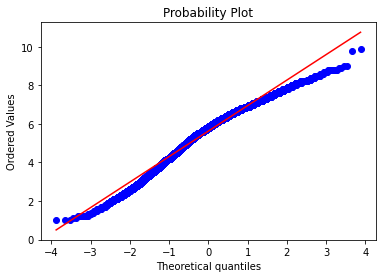

График 1


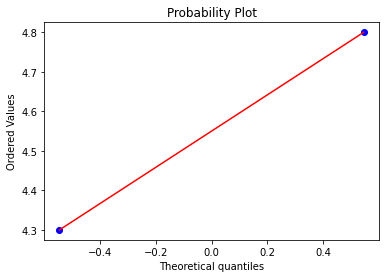

График 2


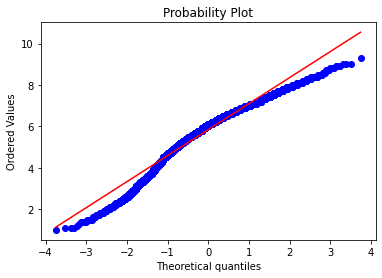

График 3


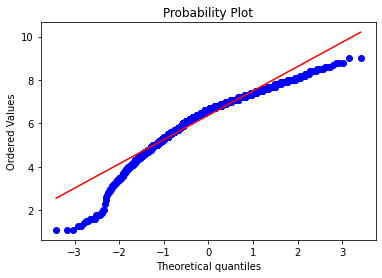

График 4


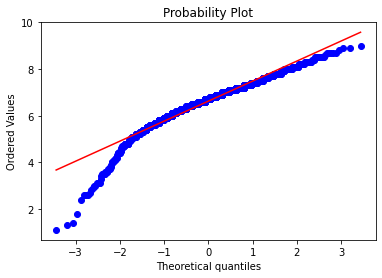

График 5


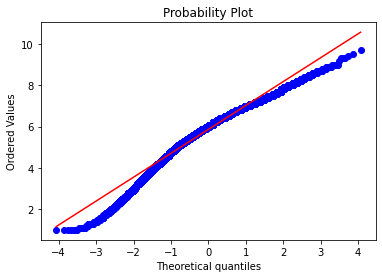

График 6


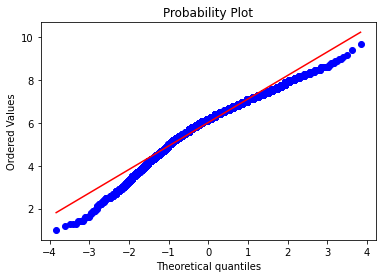

График 7


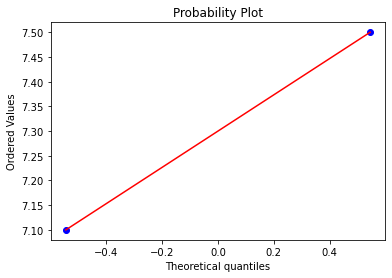

График 8


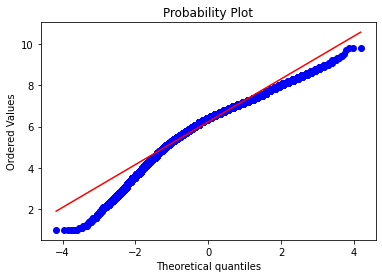

График 9


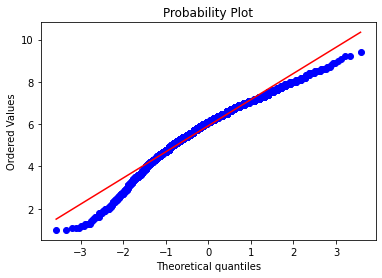

График 10


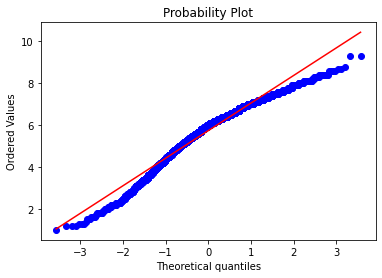

График 11


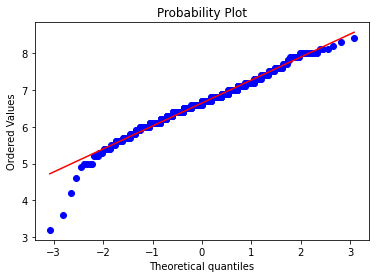

График 12


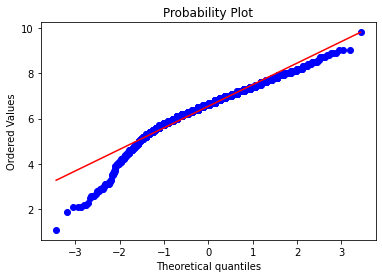

График 13


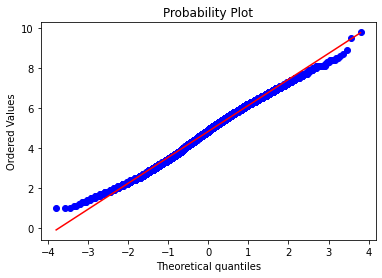

График 14


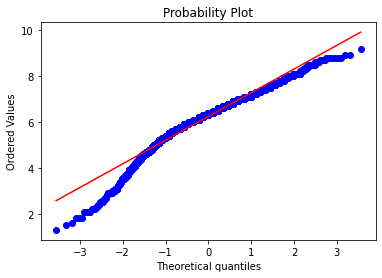

График 15


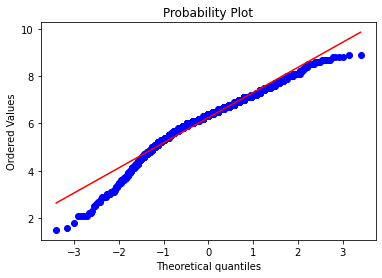

График 16


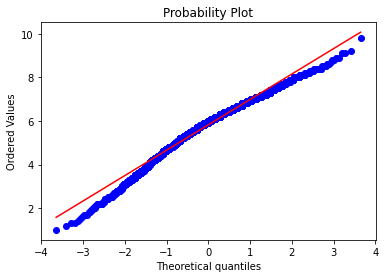

График 17


/home/fn/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/home/fn/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/fn/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


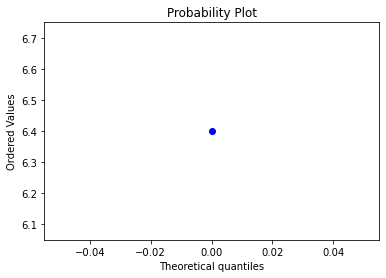

График 18


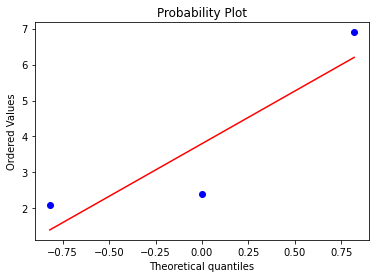

График 19


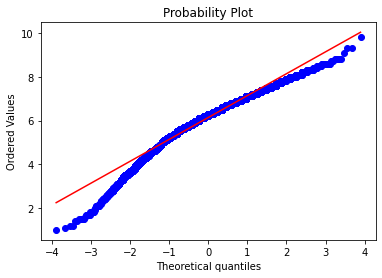

График 20


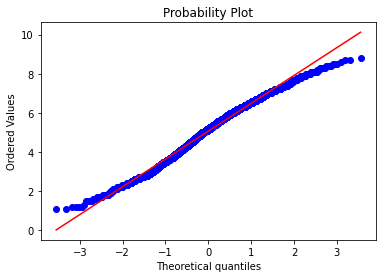

График 21


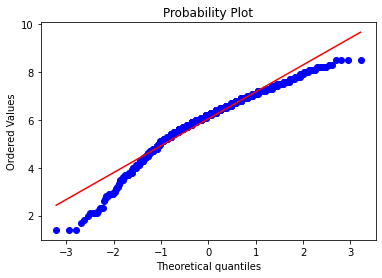

График 22


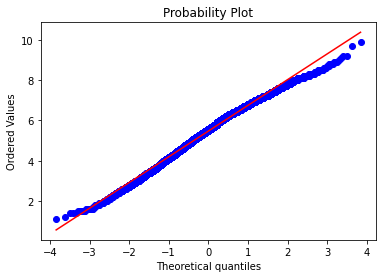

График 23


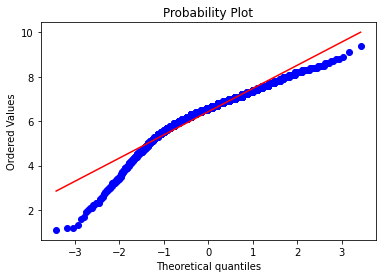

График 24


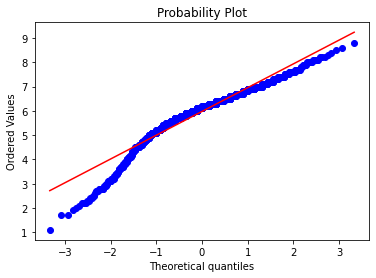

In [23]:
for i in range(len(genre_values)):
  print(f"График {i}")
  stats.probplot(genre_values[i], dist='norm', plot=pylab)
  pylab.show()

In [24]:
import pandas as pd

In [25]:
genre_values_df = pd.DataFrame(genre_values)

In [26]:
genre_values_df = genre_values_df.T

In [27]:
genre_values_df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,6.3,4.8,7.0,7.8,6.1,5.8,6.1,7.5,6.1,5.2,...,7.1,7.0,6.4,6.9,5.9,6.2,5.7,7.1,6.7,6.5
1,5.7,4.3,6.2,6.7,5.7,6.3,7.0,7.1,5.8,5.5,...,6.5,7.0,NaN,2.4,6.8,6.5,5.2,6.9,6.5,5.6
2,7.3,NaN,7.1,7.8,6.8,6.4,7.0,NaN,5.2,6.2,...,6.2,6.4,NaN,2.1,5.7,6.3,6.4,7.7,6.3,6.6
3,6.2,NaN,5.2,6.2,6.8,5.9,7.0,NaN,7.0,6.7,...,7.0,7.0,NaN,NaN,5.7,7.0,6.0,6.5,6.0,6.6
4,4.7,NaN,5.5,6.7,6.5,6.1,6.0,NaN,5.7,7.0,...,6.4,8.1,NaN,NaN,6.6,5.9,6.4,7.0,5.6,6.8


In [28]:
import matplotlib.pyplot as plt

In [29]:
len(genre_values_df.columns)

25

Гистограмма 0


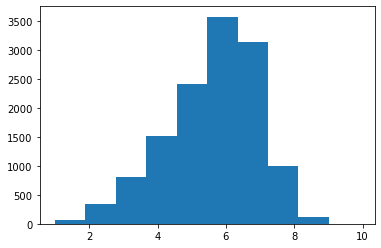

Гистограмма 1


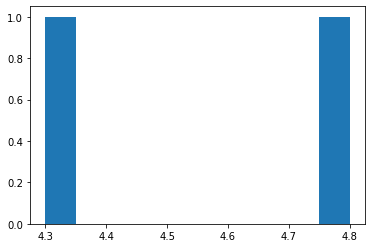

Гистограмма 2


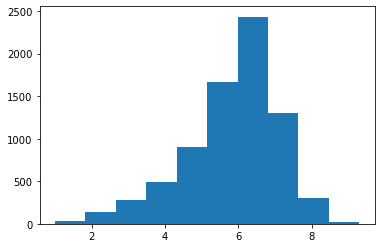

Гистограмма 3


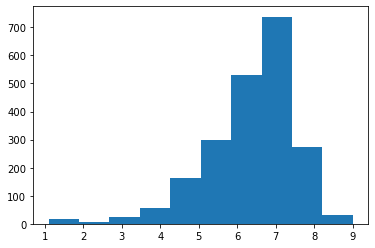

Гистограмма 4


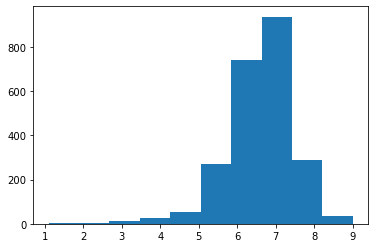

Гистограмма 5


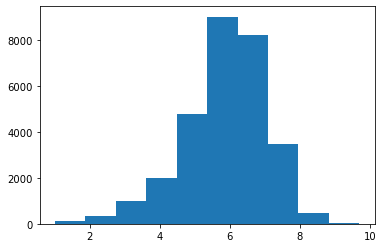

Гистограмма 6


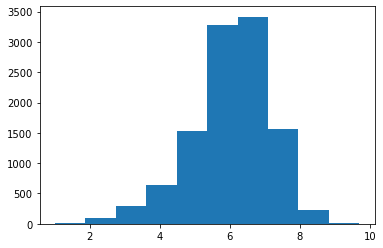

Гистограмма 7


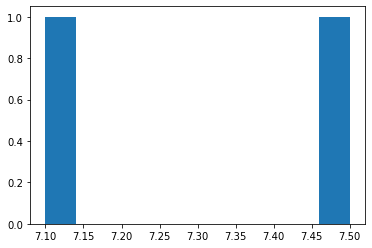

Гистограмма 8


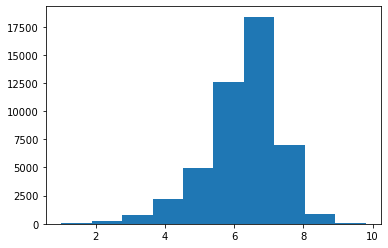

Гистограмма 9


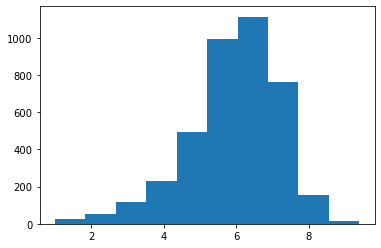

Гистограмма 10


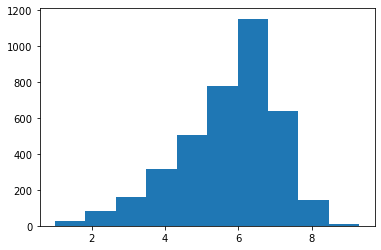

Гистограмма 11


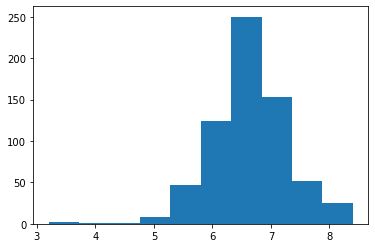

Гистограмма 12


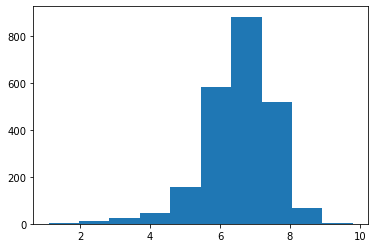

Гистограмма 13


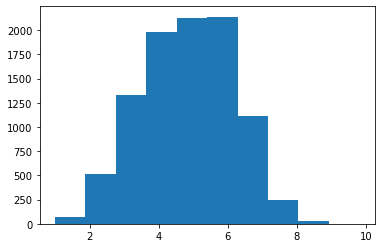

Гистограмма 14


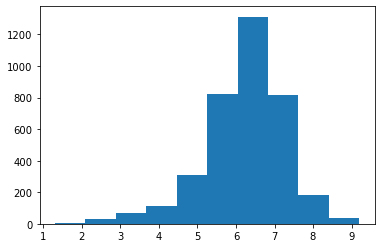

Гистограмма 15


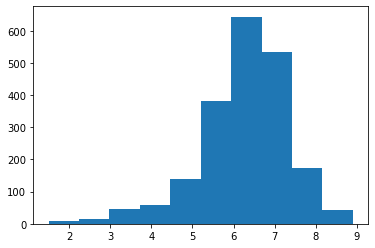

Гистограмма 16


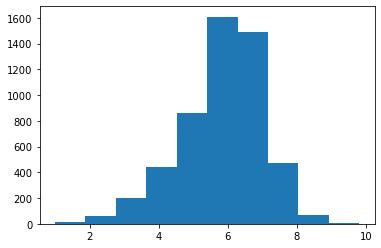

Гистограмма 17


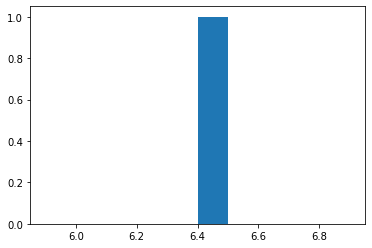

Гистограмма 18


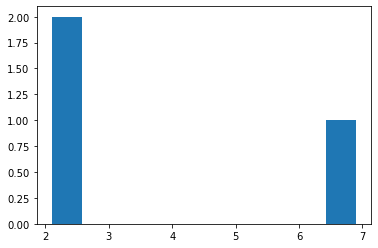

Гистограмма 19


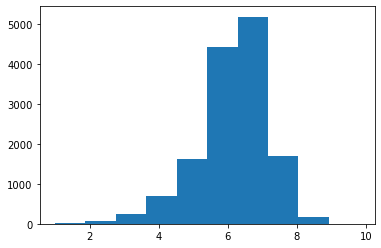

Гистограмма 20


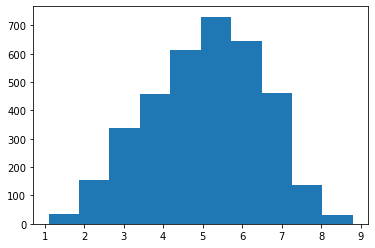

Гистограмма 21


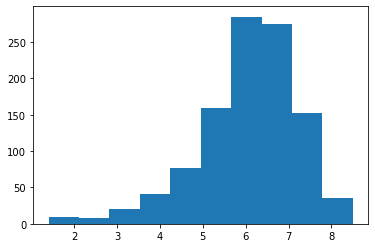

Гистограмма 22


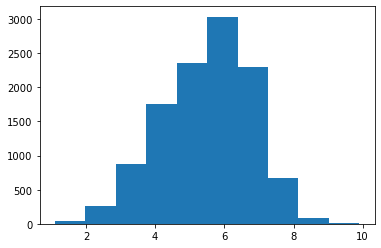

Гистограмма 23


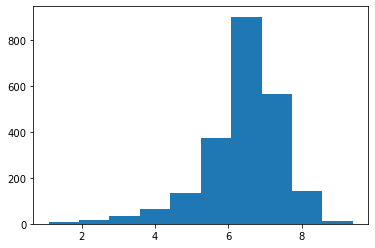

Гистограмма 24


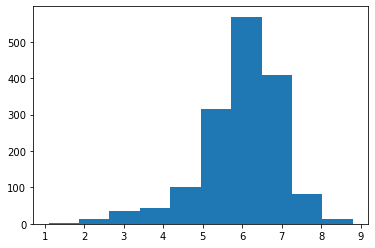

In [30]:
for i in genre_values_df.columns.to_list():
    print(f"Гистограмма {i}")
    plt.hist(genre_values_df[i])
    plt.show()

Убираю из исследования неинформативные и не соответствующие нормальноиу распределению выборки 

Проверяю эквивалентность дисперсий тестом Барлетта. Нулевая гипотеза, что дисперсии равны:

In [31]:
stat, p = stats.bartlett(genre_values[2], genre_values[6],genre_values[10], genre_values[13], genre_values[16],
      genre_values[20], genre_values[22])

In [32]:
p

5.909189515702584e-111

In [33]:
stat, p = stats.cochran(genre_values[2], genre_values[6],genre_values[10], genre_values[13], genre_values[16],
      genre_values[20], genre_values[22])

AttributeError: module 'scipy.stats' has no attribute 'cochran'

Странно, ну ладно.

Смотрим std и среднее по выборкам

In [35]:
selections = [2, 6, 10, 13, 16, 20, 22]

In [36]:
selections_std = []
for i in selections:
    selections_std.append(np.std(genre_values[i]))
selections_std

[1.2820069168128734,
 1.1176802082003026,
 1.3407724384200144,
 1.3033597741550214,
 1.1754345035776037,
 1.4279919029157333,
 1.2802648087481492]

In [37]:
np.mean(selections_std)

1.2753586504042427

In [38]:
selections_mean = []
for i in selections:
    selections_mean.append(np.mean(genre_values[i]))
selections_mean

[5.845810276679842,
 6.0266558236197705,
 5.7446484784889815,
 4.833347284712776,
 5.823100478468899,
 5.071369179600887,
 5.473761854583773]

In [39]:
np.quantile(selections_mean, q = [0.125, 0.875])

array([5.01186371, 5.89102166])

Ввиду огромности выборок, исследуемые параметры реагируют на малейшие выбросы. На сайте http://powerandsamplesize.com/Calculators/Compare-k-Means/1-Way-ANOVA-Pairwise найду размер репрезентативных выборок. std вставлю в калькулятор средний по выборкам. Если брать минимальный и максимальный средние, то достаточно 35 наблюдений в выборке, а средние с минимальной дельтой требуют выборку в 38000 наблюдений. Чтобы получить адекватное значение сравню средние по 0,125 и 0,875 квантилям. Получилось что достаточно выборок по 60 наблюдениям. 

In [41]:
genre_values60 = []
for i in genre_values:
  random.seed(90)
  random_list_60 = [random.randint(0, len(i)-1) for _ in range(60)]
  genre = []
  for j in random_list_60:
    genre.append(i[j])
  genre_values60.append(genre)

График 0


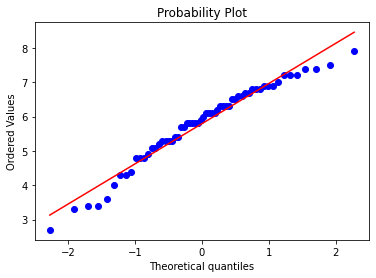

График 1


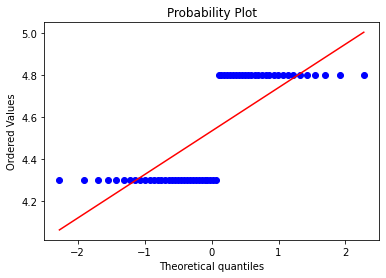

График 2


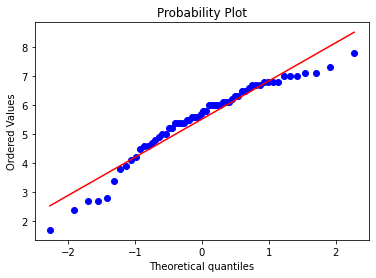

График 3


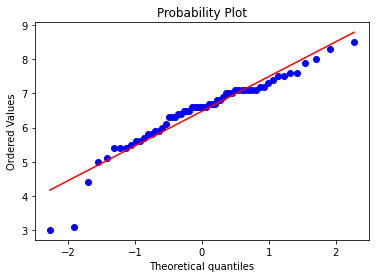

График 4


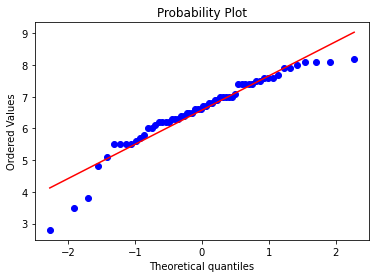

График 5


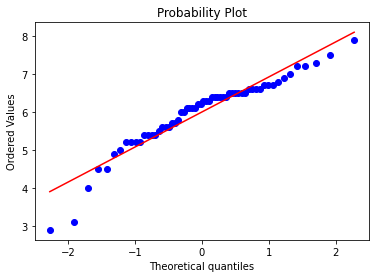

График 6


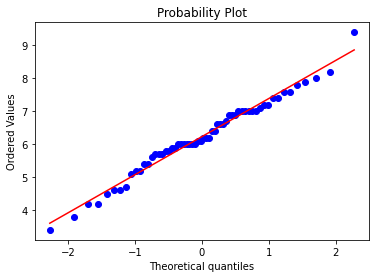

График 7


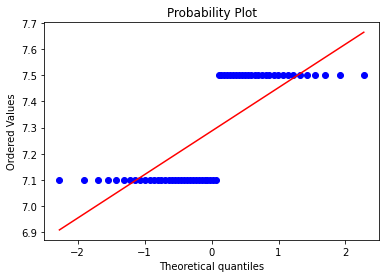

График 8


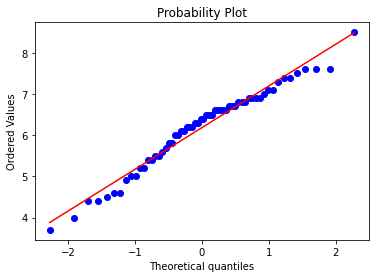

График 9


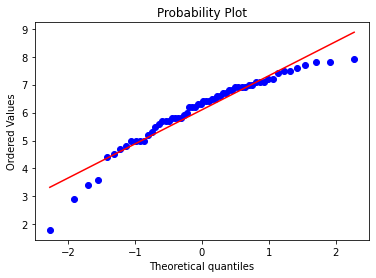

График 10


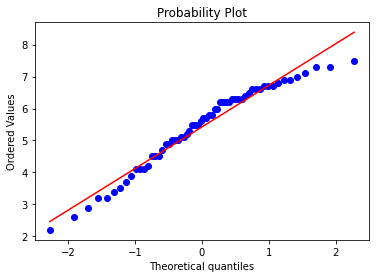

График 11


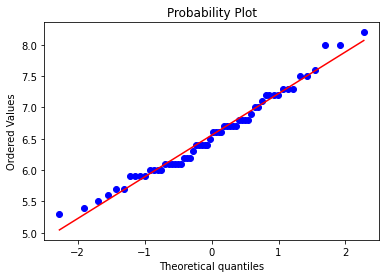

График 12


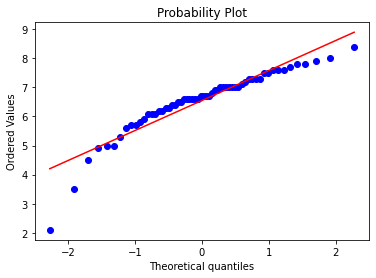

График 13


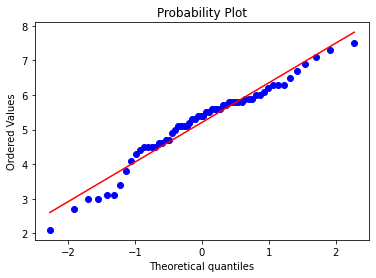

График 14


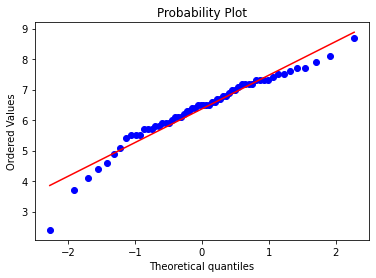

График 15


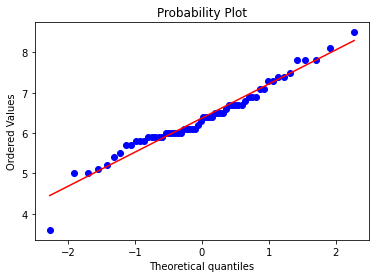

График 16


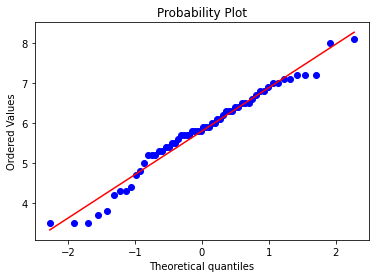

График 17


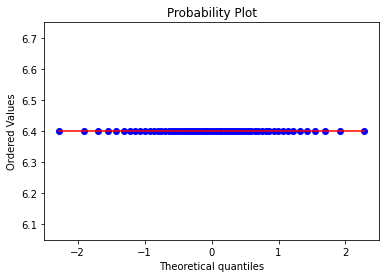

График 18


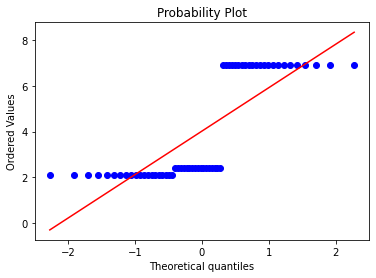

График 19


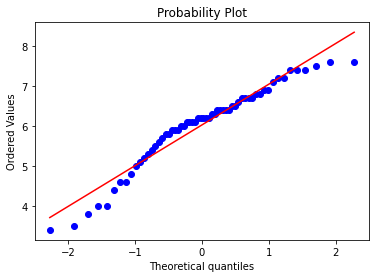

График 20


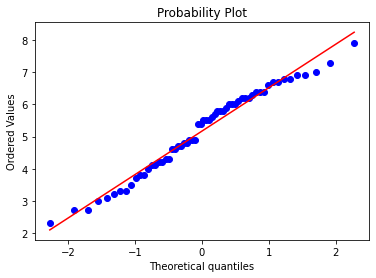

График 21


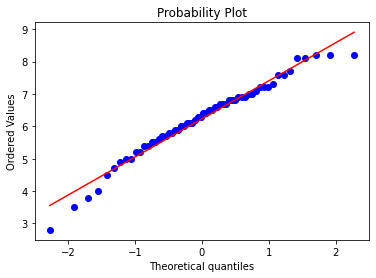

График 22


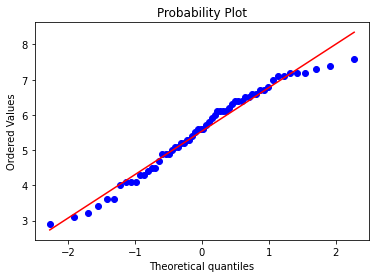

График 23


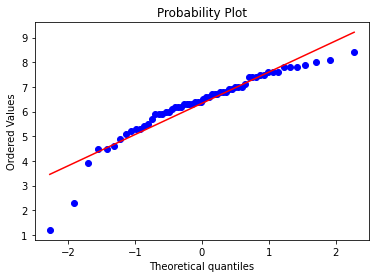

График 24


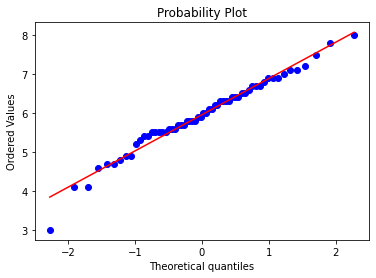

In [42]:
for i in range(len(genre_values60)):
  print(f"График {i}")
  stats.probplot(genre_values60[i], dist='norm', plot=pylab)
  pylab.show()

Проверяю эквивалентность дисперсий тестом Барлетта на выборках близких к нормальным. Нулевая гипотеза, что дисперсии равны:

In [44]:
stat, p = stats.bartlett(genre_values60[2], genre_values60[6],  genre_values60[10], 
        genre_values60[13], genre_values60[16], genre_values60[20], 
                         genre_values60[22])

In [45]:
p

0.5353718376511962

Проведем однофакторный дисперсионный анализ. Сначала найдем средние оценки для каждого жанра:

In [53]:
selections_means = []
for i in selections:
    selections_means.append((genre_values60[i], np.mean(genre_values60[i])))
selections_means[0]

([6.0,
  5.0,
  7.0,
  2.7,
  6.0,
  5.5,
  5.8,
  7.3,
  6.8,
  5.4,
  4.2,
  4.5,
  3.9,
  5.4,
  4.9,
  2.7,
  6.0,
  6.7,
  4.8,
  5.5,
  3.4,
  4.6,
  4.7,
  5.2,
  6.2,
  5.4,
  6.1,
  3.8,
  6.0,
  6.8,
  5.2,
  5.7,
  5.0,
  5.4,
  6.7,
  2.4,
  7.0,
  6.0,
  5.6,
  6.8,
  1.7,
  6.1,
  6.8,
  6.3,
  7.8,
  4.6,
  6.6,
  6.3,
  6.7,
  6.1,
  2.8,
  6.5,
  7.1,
  7.1,
  6.5,
  5.8,
  5.6,
  5.6,
  7.0,
  4.1],
 5.5200000000000005)

Соберем все значения по жанрам в один массив:

In [54]:
genre_values_all = np.concatenate([genre_values60[2], genre_values60[6], 
        genre_values60[13], genre_values60[16], genre_values60[20], 
          genre_values60[10], genre_values60[22]])
genre_values_all

array([6. , 5. , 7. , 2.7, 6. , 5.5, 5.8, 7.3, 6.8, 5.4, 4.2, 4.5, 3.9,
       5.4, 4.9, 2.7, 6. , 6.7, 4.8, 5.5, 3.4, 4.6, 4.7, 5.2, 6.2, 5.4,
       6.1, 3.8, 6. , 6.8, 5.2, 5.7, 5. , 5.4, 6.7, 2.4, 7. , 6. , 5.6,
       6.8, 1.7, 6.1, 6.8, 6.3, 7.8, 4.6, 6.6, 6.3, 6.7, 6.1, 2.8, 6.5,
       7.1, 7.1, 6.5, 5.8, 5.6, 5.6, 7. , 4.1, 5.1, 6. , 6. , 5.2, 9.4,
       6. , 6.9, 6. , 7. , 5.7, 7.1, 6.9, 8. , 5.8, 5.4, 6. , 5.9, 7.2,
       6.9, 4.6, 5.4, 6.4, 4.6, 3.4, 5.9, 4.7, 6.2, 6.6, 6.2, 7. , 6.1,
       6.7, 6.6, 7. , 8.2, 5.7, 7.2, 6.2, 6. , 7.6, 6.6, 6. , 6.4, 7. ,
       6.1, 5.8, 7.6, 7.4, 3.8, 4.5, 5.2, 7.9, 7. , 7.8, 5.6, 7.4, 7. ,
       4.2, 5.7, 4.2, 2.7, 6.9, 4.5, 6.7, 4.9, 5.8, 5.3, 5.6, 4.5, 2.1,
       5.6, 5.6, 4.1, 4.7, 7.5, 4.6, 5.8, 5.7, 4.4, 3. , 7.3, 5.9, 5.4,
       3. , 7.1, 5.1, 5. , 5.7, 4.6, 4.5, 5.5, 5.1, 5.3, 5.1, 4.7, 5.8,
       6.5, 6.3, 6.3, 6.2, 5.5, 5.9, 6.3, 4.3, 5.8, 3.1, 3.8, 4.5, 3.4,
       5.9, 6.1, 5.8, 5.4, 6. , 5.1, 5.2, 3.1, 5.6, 6. , 5.4, 5.

Найдем среднюю оценку по всем значениям:

In [55]:
y_mean = np.mean(genre_values_all)
print(y_mean)

5.557619047619047


Найдем $S^2$  — сумму квадратов отклонений наблюдений от общего среднего:

In [56]:
s2 = np.sum((genre_values_all - y_mean)**2)
s2

668.645619047619

Найдем $S^2_F$ - сумму квадратов отклонений средних групповых значений от общего среднего:

In [57]:
s2_f = 0
for i in selections_means:
    s2_f += (i[1] - y_mean)**2 * 60
s2_f

48.49128571428563

Найдем $S^2_{ост}$ — остаточную сумму квадратов отклонений:

In [58]:
s2_residual = 0
for i in selections_means:
    s2_residual += ((i[0] - i[1])**2).sum()
s2_residual

620.1543333333333

Удостоверимся, что соблюдается равенство $S^2 = S_F^2 + S_{ост}^2$:

In [59]:
s2 - (s2_f + s2_residual)

1.1368683772161603e-13

In [60]:
# Всего 7 групп по 60 наблюдений
k = 7
n = 420

Найдем общую дисперсию:

In [61]:
sigma2_general = s2 / (n - 1)
sigma2_general

1.5958129332878734

Найдем факторную дисперсию:

In [62]:
sigma2_f = s2_f / (k - 1)
sigma2_f

8.081880952380939

Найдем остаточную дисперсию:

In [63]:
sigma2_residual = s2_residual / (n - k)
sigma2_residual

1.5015843422114608

Вычислим $F_H$:

In [64]:
F_h = sigma2_f / sigma2_residual
F_h

5.382235766043175

Найдем значение Fкрит
в таблице критических точек распределения Фишера-Снедекора для заданного уровня значимости α=0.05
и двух степеней свободы:

dfмежд=k−1=7−1=6

и dfвнутр=n−k=420−7=413

https://www.matburo.ru/tv/table_fisher.pdf dfвнутр в таблице заканчивается на 60, дальше бесконечность, беру бесконечность.

Для данных значений Fкрит=2,09
. Так как $F_H > F_{крит}$,  различие оценок в 7 жанрах статистически значимо.

Также вычислим Эмпирический коэффициент детерминации $\eta^2$:

In [65]:
eta2 = s2_f / s2
eta2

0.07252165322395124

# И эмпирическое корреляционное отношение, которое показывает, что жанр далеко не самый важный признак, влияющий на рейтинг фильма.

In [66]:
np.sqrt(eta2)

0.26929844638235706

Проведем те же самые расчеты используя мощный аппарат  Scipy

In [67]:
stats.f_oneway?

In [68]:
stats.f_oneway(genre_values60[2], genre_values60[6], 
        genre_values60[13], genre_values60[16], genre_values60[20], 
          genre_values60[10], genre_values60[22])

F_onewayResult(statistic=5.382235766043186, pvalue=2.278539888085873e-05)

получили что pvalue=2.278539888085873e-05 значительно меньше 5%, этого достаточно чтобы сделать вывод, что различие оценок в 7 жанрах статистически значимо.

In [1]:
def anova_an(col_name): 
    """ Функция для автоматического вычисления характеристик для ANOVA"""
    # это все возможные значения, сразу объединили
    y_all = data_train[col_name].values
    # это соответственно общее среднее
    y_mean = np.mean(y_all)
    # это сумма квадратов отклонений наблюдений от общего среднего
    s2 = np.sum((y_all - y_mean)**2)

    s2_f = 0
    s2_residual = 0
    for i in all_cats:
        # взяли ВСЕ значения нужного столбца для определенной категории. т.е. условно вытащили y1,y2...yn
        b = data_train.loc[data_train['Category']==i,col_name].values
        # посчитали в цикле сумму квадратов отклонений средних групповых значений от общего среднего
        # то есть каждую итерацию цикла прибавляем к ней значение для нового массива
        s2_f += ((b.mean() - y_mean)**2)*len(b)
        #  посчитали в цикле остаточную сумму квадратов отклонений
        s2_residual += np.sum((b - b.mean())**2)
    
    # это размер выборки всего
    n = len(data_train) 
    # это получается количество выборок
    k = len(all_cats) 

    # общая дисперсия
    sigma2_general = s2 / (n - 1) 
    # факторная дисперсия
    sigma2_f = s2_f / (k - 1)
    # остаточная дисперсия
    sigma2_residual = s2_residual / (n - k)

    # Fh
    F_h = sigma2_f / sigma2_residual
    #  эмпирическое корреляционное отношение
    eta2 = s2_f / s2


    print('s2: {}, s2_f: {}, s2_residual: {}, s2_f + s2_residual: {}'.format(s2, s2_f, s2_residual, s2_f + s2_residual))
    print('sigma2_general: {}, sigma2_f: {}, sigma2_residual: {}'.format(sigma2_general, sigma2_f, sigma2_residual))
    print('F_h: {}'.format(F_h))
    print('k-1: {}, n-k: {}'.format(k-1, n-k))
    print('eta2: {}'.format(eta2))